## Importing Libraries

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import tensorflow as tf
# from tf import keras

import keras
import visualkeras
from keras import Sequential
from keras.layers import Dropout , Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Embedding, Bidirectional,LSTM, GRU


from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adadelta
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

import string
from string import digits
import itertools
import collections

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mphib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mphib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mphib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing Dataset

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## About the Data

Twitter has become a perfect platform for the global population to report any accident or disaster. However, there are also a large number of tweets that are simply bot generated or for advertisment purposes. Therefore, to differentiate between the actual and hoax, it has become impertive for the various disaster response agencies to monitor the feed while cleaning out the incorrect tweets from the actual ones to generate the subsequent response. The following dataset has been taken from kaggle to correctly identify the two type of tweets.

The dataset consists of train and test data. The former has **7613 observations on 5 features** and the latter has **3263 observations on 4 features**. The features include are 'id', 'keyword' , 'location', 'text' and 'target'. The tweets have been manually marked as **'1' meaning actual disaster** and **'0' indicating not a real disaster**.

## Data Preprocessing

In [8]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [9]:
train.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

In [10]:
test.info

<bound method DataFrame.info of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
326

**Removing redundant columns**

In [11]:
train = train.drop(['id','keyword','location'], axis = 1)

In [12]:
train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


**Cleaning the text**

In [13]:
stop = set(nltk.corpus.stopwords.words('english'))
stop_words = stop.union({"http"}) ###IMPORTANT######################################################


def cleaning(x):
    
    # converting to words
    tokens = word_tokenize(x)
    
    # convert to lower case
    words = [w.lower() for w in tokens]
    
    # removing alphanumerics
    words = [word for word in words if word.isalpha()]
    
    # removing punctuations
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]    
        
    # removing stopwords after modification
    words_mod = [w for w in stripped if not w in stop_words]
    
    # word lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = " ".join([lemmatizer.lemmatize(w) for w in words_mod]) 
    
    sen = " ".join(sentence.split())
        
    return (sen)

In [14]:
train_text = train.text.apply(lambda x: cleaning(x))
test_text = test.text.apply(lambda x: cleaning(x))


**Summary Analysis**

Since the objective of the project is to predict the tweets as real disaster or not based on the content, hence, we did not need to retain the additional columns and removed the columns named **'id' , 'location' and 'keyword' altogether**.

The second step involved the cleaning of the given data. For this, the following steps were performed:

1. Word Tokenization
2. Word Case to Lower
3. Removal of Punctuation
4. Removal of Alphanumerics
5. Removal of stopwords
6. Word Lemmatization

These steps to streamline the data were performed on both the train and test data.

## EDA

**Checking Balancing**

In [15]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1da30bdfdf0>,
 [Text(-0.24110481617711207, 1.0732513534192263, '0'),
  Text(0.24110481617711216, -1.0732513534192263, '1')])

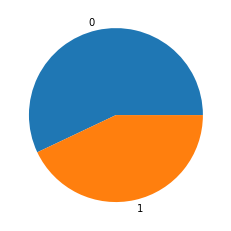

In [16]:
plt.pie(train.target.value_counts(), labels = [0,1])

**Getting word frequencies of Classes**

In [17]:
unreal = []
real  = []
for i in range(len(train.target)):
    if train.target[i] == 1:
        unreal.append(train_text[i])
    else:
        real.append(train_text[i])

In [18]:
real_token = []
unreal_token = []

for i in range(len(real)): 
    real_token.append(real[i].split(" "))

for i in range(len(unreal)):    
    unreal_token.append(unreal[i].split(" "))
    
real_token_j = list(itertools.chain.from_iterable(real_token))
unreal_token_j = list(itertools.chain.from_iterable(unreal_token))

In [19]:
real_count = collections.Counter(real_token_j)
unreal_count = collections.Counter(unreal_token_j)

In [20]:
real_df = pd.DataFrame(real_count.most_common(20),columns=["Word", "Frequency"])
unreal_df = pd.DataFrame(unreal_count.most_common(20),columns=["Word", "Frequency"])


<AxesSubplot:xlabel='Word'>

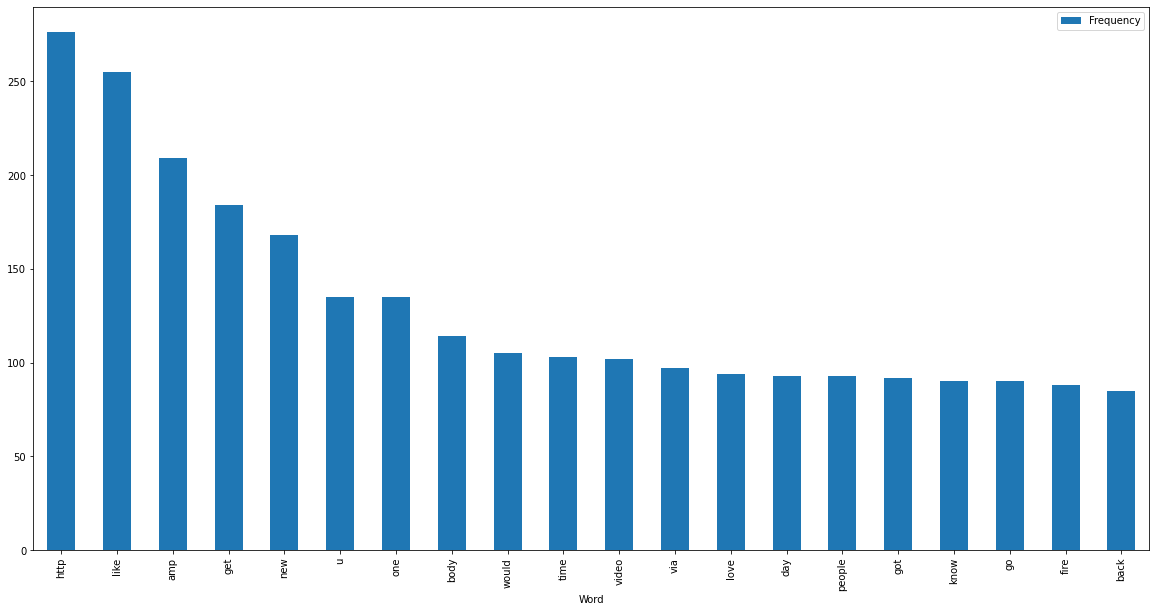

In [72]:
real_df.plot(x= "Word"  , y = "Frequency" ,kind = "bar", figsize=(20,10))

<AxesSubplot:xlabel='Word'>

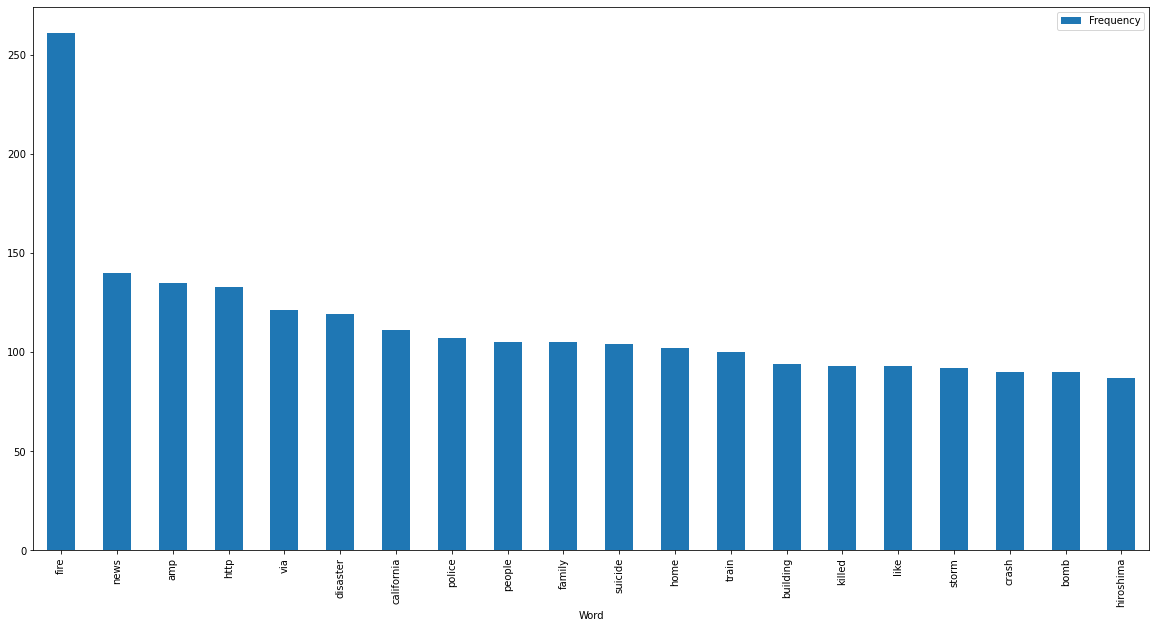

In [73]:
unreal_df.plot(x= "Word"  , y = "Frequency" ,kind = "bar", figsize=(20,10))

**Analysis**

The balancing of the data suggests that the amount of the fake tweets is less than then the actual ones. Since, the difference is not that much that it would skew the result much so we would leave it as it is.

The second part was to have a rough idea of the words that are occuring in the actual tweets to the fake ones. It reveals that the words http occurs the most in the hoax tweets followed words like, amp and get. The actual data seems to have words such fire, news and amp as the top most. It is however, pertinent to note here the words amp and http are occuring in both types albeit with different frequencies. Regardless, these words are bound to compromise the results in someway later on. 

## Model Training

In [23]:
## Tokening the cleaned tweets and converting them to a sequence for feeding into the model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text.append(test_text))

train_seq = tokenizer.texts_to_sequences(train_text.values.reshape(len(train),))
test_seq = tokenizer.texts_to_sequences(test_text.values)

In [24]:
## Joining the two datasets to get the longest tweet for padding
joint_data = train_text.append(test_text)
joint_data = list(joint_data)
j_token = []
for i in range(len(joint_data)): 
    j_token.append(joint_data[i].split(" "))
    
tok_j = list(itertools.chain.from_iterable(real_token))

In [25]:
len(joint_data)

10876

In [26]:
len(tok_j)

36058

In [27]:
max(len(x.split()) for x in joint_data)

23

In [28]:
train_pad = pad_sequences(train_seq, maxlen=23, padding='post')
test_pad = pad_sequences(test_seq, maxlen=23, padding='post')

### Model Architecture Design

The model architecture was designed to have 3 layers in total. We will be making and testing 3 models with the bidirectional which would enhance our model by giving it the ability to learn from both forward and backward way. We will change it **LSTM, GRU and a combination of LSTM & GRU**.

1. The initial layer with input length as 23 with padding, with LSTM(Long short term memory) gates on 100 hidden units. The drop out was set at 0.2 to reduce the probability of overfitting.
2. The second layer designed as dense with the activation set at relu.
3. The output layer was also taken as dense but with activation set to sigmoid now.

**LSTM**

In [29]:
embed_units = 100
hidden_units = 128
model1 = Sequential()


model1.add(Embedding(36059, embed_units, input_length = 23))
model1.add(Bidirectional(LSTM(hidden_units)))
model1.add(Dropout(0.2))


model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 100)           3605900   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 3,906,445
Trainable params: 3,906,445
Non-trainable params: 0
______________________________________________

In [30]:
learning_rate = 0.001
model1.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [31]:
model_hist1 = model1.fit((train_pad), (train.target),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 15s 57ms/step - loss: 0.5381 - accuracy: 0.7259 - val_loss: 0.4690 - val_accuracy: 0.7879
Epoch 2/5
191/191 [==============================] - 10s 54ms/step - loss: 0.2976 - accuracy: 0.8814 - val_loss: 0.4978 - val_accuracy: 0.7722
Epoch 3/5
191/191 [==============================] - 11s 58ms/step - loss: 0.1741 - accuracy: 0.9356 - val_loss: 0.6098 - val_accuracy: 0.7275
Epoch 4/5
191/191 [==============================] - 10s 51ms/step - loss: 0.1141 - accuracy: 0.9611 - val_loss: 0.7613 - val_accuracy: 0.7255
Epoch 5/5
191/191 [==============================] - 9s 49ms/step - loss: 0.0777 - accuracy: 0.9714 - val_loss: 1.0191 - val_accuracy: 0.7295


**GRU**

In [32]:
embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(GRU(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 23, 100)           3605900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               176640    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 3,848,589
Trainable params: 3,848,589
Non-trainable params: 0
____________________________________________

In [33]:
learning_rate = 0.001
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model_hist_2 = model2.fit((train_pad), (train.target),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 15s 55ms/step - loss: 0.5288 - accuracy: 0.7307 - val_loss: 0.4633 - val_accuracy: 0.7951
Epoch 2/5
191/191 [==============================] - 9s 48ms/step - loss: 0.2841 - accuracy: 0.8852 - val_loss: 0.5103 - val_accuracy: 0.7623
Epoch 3/5
191/191 [==============================] - 9s 47ms/step - loss: 0.1627 - accuracy: 0.9419 - val_loss: 0.5809 - val_accuracy: 0.7328
Epoch 4/5
191/191 [==============================] - 9s 49ms/step - loss: 0.1053 - accuracy: 0.9634 - val_loss: 0.7373 - val_accuracy: 0.7104
Epoch 5/5
191/191 [==============================] - 10s 52ms/step - loss: 0.0830 - accuracy: 0.9718 - val_loss: 0.7235 - val_accuracy: 0.7183


**LSTM & GRU**

In [36]:
embed_units = 100

model3 = Sequential()


model3.add(Embedding(36059, embed_units, input_length = 23))
model3.add(Bidirectional(GRU(256)))
model3.add(Dropout(0.2))

model3.add(Embedding(36059, embed_units))
model3.add(Bidirectional(LSTM(256)))
model3.add(Dropout(0.2))

model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 23, 100)           3605900   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512)               549888    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 512, 100)          3605900   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 512)               731136    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [38]:
learning_rate = 0.001
model3.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model3.fit((train_pad), (train.target),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 277s 1s/step - loss: 0.6829 - accuracy: 0.5788 - val_loss: 0.6936 - val_accuracy: 0.5345
Epoch 2/5
191/191 [==============================] - 247s 1s/step - loss: 0.6822 - accuracy: 0.5793 - val_loss: 0.6934 - val_accuracy: 0.5345
Epoch 3/5
191/191 [==============================] - 267s 1s/step - loss: 0.6818 - accuracy: 0.5793 - val_loss: 0.6922 - val_accuracy: 0.5345
Epoch 4/5
191/191 [==============================] - 318s 2s/step - loss: 0.6816 - accuracy: 0.5793 - val_loss: 0.6934 - val_accuracy: 0.5345
Epoch 5/5
191/191 [==============================] - 373s 2s/step - loss: 0.6816 - accuracy: 0.5793 - val_loss: 0.6933 - val_accuracy: 0.5345


**Results**

From the above results, we can broadly see that the LSTM is performing much better then the other two models. The difference against GRU is quite small with the GRU also generally faster and simpler then the LSTM. However, we will stick with the LSTM.

### Optimizer Selection

After getting the general architecture, we will tweak the optimizers to get the best one. We will test 4 optimizers for the model that are:

1. Adam
2. RMSprop
3. Adagrad
4. Adadelta

**Adam**

In [39]:
embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

learning_rate = 0.001
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 23, 100)           3605900   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 3,906,445
Trainable params: 3,906,445
Non-trainable params: 0
____________________________________________

In [40]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 12s 42ms/step - loss: 0.5341 - accuracy: 0.7278 - val_loss: 0.4773 - val_accuracy: 0.7846
Epoch 2/5
191/191 [==============================] - 8s 41ms/step - loss: 0.2853 - accuracy: 0.8854 - val_loss: 0.5011 - val_accuracy: 0.7840
Epoch 3/5
191/191 [==============================] - 7s 38ms/step - loss: 0.1696 - accuracy: 0.9383 - val_loss: 0.5850 - val_accuracy: 0.7564
Epoch 4/5
191/191 [==============================] - 7s 38ms/step - loss: 0.1095 - accuracy: 0.9621 - val_loss: 0.8344 - val_accuracy: 0.7538
Epoch 5/5
191/191 [==============================] - 7s 39ms/step - loss: 0.0756 - accuracy: 0.9706 - val_loss: 0.8595 - val_accuracy: 0.7301


**RMSprop**

In [41]:
embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [42]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 8s 29ms/step - loss: 0.5332 - accuracy: 0.7343 - val_loss: 0.4712 - val_accuracy: 0.7827
Epoch 2/5
191/191 [==============================] - 5s 28ms/step - loss: 0.3624 - accuracy: 0.8493 - val_loss: 0.4609 - val_accuracy: 0.7833
Epoch 3/5
191/191 [==============================] - 6s 29ms/step - loss: 0.3072 - accuracy: 0.8805 - val_loss: 0.4875 - val_accuracy: 0.7820
Epoch 4/5
191/191 [==============================] - 6s 29ms/step - loss: 0.2526 - accuracy: 0.9067 - val_loss: 0.4944 - val_accuracy: 0.7715
Epoch 5/5
191/191 [==============================] - 5s 28ms/step - loss: 0.2116 - accuracy: 0.9251 - val_loss: 0.5760 - val_accuracy: 0.7571


**Adagrad**

In [43]:
embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'Adagrad',
              metrics = ['accuracy'])

In [44]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 8s 25ms/step - loss: 0.6893 - accuracy: 0.5775 - val_loss: 0.6910 - val_accuracy: 0.5345
Epoch 2/5
191/191 [==============================] - 4s 22ms/step - loss: 0.6854 - accuracy: 0.5793 - val_loss: 0.6908 - val_accuracy: 0.5345
Epoch 3/5
191/191 [==============================] - 4s 23ms/step - loss: 0.6832 - accuracy: 0.5793 - val_loss: 0.6912 - val_accuracy: 0.5345
Epoch 4/5
191/191 [==============================] - 4s 23ms/step - loss: 0.6823 - accuracy: 0.5793 - val_loss: 0.6917 - val_accuracy: 0.5345
Epoch 5/5
191/191 [==============================] - 4s 22ms/step - loss: 0.6815 - accuracy: 0.5793 - val_loss: 0.6922 - val_accuracy: 0.5345


**AdaDelta**

In [45]:
embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'AdaDelta',
              metrics = ['accuracy'])

In [46]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 8s 26ms/step - loss: 0.6927 - accuracy: 0.5299 - val_loss: 0.6930 - val_accuracy: 0.5279
Epoch 2/5
191/191 [==============================] - 4s 23ms/step - loss: 0.6925 - accuracy: 0.5504 - val_loss: 0.6929 - val_accuracy: 0.5325
Epoch 3/5
191/191 [==============================] - 4s 22ms/step - loss: 0.6921 - accuracy: 0.5673 - val_loss: 0.6928 - val_accuracy: 0.5345
Epoch 4/5
191/191 [==============================] - 5s 24ms/step - loss: 0.6918 - accuracy: 0.5703 - val_loss: 0.6926 - val_accuracy: 0.5345
Epoch 5/5
191/191 [==============================] - 5s 25ms/step - loss: 0.6915 - accuracy: 0.5765 - val_loss: 0.6925 - val_accuracy: 0.5345


**Analysis**

After our test, we can see that the RMSprop is the best choice amongst the 4. However, it is almsot at par with the Adam optimization. It was expected as these two are the most contemporary correcting the learning rates, bias and momentum rates from the 2 simpler optimizers as Adagrad and Adadelta.

## Hyperparameter Tuning

**Learning Rate**

In [47]:
## Learning rate 0.005
embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.005
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [48]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 8s 28ms/step - loss: 0.5319 - accuracy: 0.7323 - val_loss: 0.4779 - val_accuracy: 0.7840
Epoch 2/5
191/191 [==============================] - 5s 25ms/step - loss: 0.3599 - accuracy: 0.8499 - val_loss: 0.4709 - val_accuracy: 0.7925
Epoch 3/5
191/191 [==============================] - 5s 24ms/step - loss: 0.3018 - accuracy: 0.8818 - val_loss: 0.4881 - val_accuracy: 0.7748
Epoch 4/5
191/191 [==============================] - 5s 25ms/step - loss: 0.2501 - accuracy: 0.9071 - val_loss: 0.5208 - val_accuracy: 0.7577
Epoch 5/5
191/191 [==============================] - 5s 27ms/step - loss: 0.2025 - accuracy: 0.9319 - val_loss: 0.6782 - val_accuracy: 0.6770


In [49]:
## Learning rate 0.008

embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.008
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [50]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 9s 30ms/step - loss: 0.5261 - accuracy: 0.7351 - val_loss: 0.4685 - val_accuracy: 0.7984
Epoch 2/5
191/191 [==============================] - 5s 28ms/step - loss: 0.3626 - accuracy: 0.8525 - val_loss: 0.4746 - val_accuracy: 0.7912
Epoch 3/5
191/191 [==============================] - 5s 27ms/step - loss: 0.3036 - accuracy: 0.8760 - val_loss: 0.4913 - val_accuracy: 0.7676
Epoch 4/5
191/191 [==============================] - 5s 27ms/step - loss: 0.2477 - accuracy: 0.9077 - val_loss: 0.5156 - val_accuracy: 0.7623
Epoch 5/5
191/191 [==============================] - 5s 28ms/step - loss: 0.2035 - accuracy: 0.9297 - val_loss: 0.5837 - val_accuracy: 0.7124


In [51]:
## Learning rate 0.003

embed_units = 100
hidden_units = 128

model2 = Sequential()


model2.add(Embedding(36059, embed_units, input_length = 23))
model2.add(Bidirectional(LSTM(hidden_units)))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.003
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [52]:
model2.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 10s 30ms/step - loss: 0.5353 - accuracy: 0.7289 - val_loss: 0.4843 - val_accuracy: 0.7840
Epoch 2/5
191/191 [==============================] - 6s 30ms/step - loss: 0.3637 - accuracy: 0.8470 - val_loss: 0.4784 - val_accuracy: 0.7873
Epoch 3/5
191/191 [==============================] - 5s 27ms/step - loss: 0.3099 - accuracy: 0.8790 - val_loss: 0.4715 - val_accuracy: 0.7715
Epoch 4/5
191/191 [==============================] - 5s 27ms/step - loss: 0.2670 - accuracy: 0.9010 - val_loss: 0.5403 - val_accuracy: 0.7505
Epoch 5/5
191/191 [==============================] - 5s 28ms/step - loss: 0.2180 - accuracy: 0.9223 - val_loss: 0.5608 - val_accuracy: 0.7177


**Analysis**

The learning rates tweak gives us the best **learning rate as 0.005**.

## Final Model

In [75]:
model_f = Sequential()


model_f.add(Embedding(36059, 100, input_length = 23))
model_f.add(Bidirectional(GRU(100)))
model_f.add(Dropout(0.2))

model_f.add(Dense(256, activation='relu'))
model_f.add(Dropout(0.2))
model_f.add(Dense(1, activation='sigmoid'))

learning_rate = 0.005
model_f.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [76]:
model_f.fit((train_pad), (train.target.values),                          
                          epochs=5, 
                          validation_split=0.2)

Epoch 1/5
191/191 [==============================] - 12s 39ms/step - loss: 0.5274 - accuracy: 0.7346 - val_loss: 0.4897 - val_accuracy: 0.7827
Epoch 2/5
191/191 [==============================] - 6s 34ms/step - loss: 0.3616 - accuracy: 0.8532 - val_loss: 0.4561 - val_accuracy: 0.7919
Epoch 3/5
191/191 [==============================] - 7s 36ms/step - loss: 0.3014 - accuracy: 0.8833 - val_loss: 0.5253 - val_accuracy: 0.7347
Epoch 4/5
191/191 [==============================] - 8s 40ms/step - loss: 0.2478 - accuracy: 0.9082 - val_loss: 0.5369 - val_accuracy: 0.7557
Epoch 5/5
191/191 [==============================] - 8s 42ms/step - loss: 0.2076 - accuracy: 0.9269 - val_loss: 0.5767 - val_accuracy: 0.7085


## Result & Analysis

**Model Architecture Comparison**

In [77]:
# LSTM
l_train_accuracy = [0.73,0.88,0.94,0.96,0.97]
l_val_accuracy = [0.79,0.77,0.73,0.73,0.72]
l_train_loss = [0.54,0.30,0.17,0.11,0.08]
l_val_loss = [0.47,0.50,0.61,0.76,1.0]

ep = [1,2,3,4,5]
dict1 = {'epoch': ep, 'tr_loss': l_train_loss, 'tr_score': l_train_accuracy,
         'val_loss': l_val_loss, 'val_score': l_val_accuracy} 
df_lstm = pd.DataFrame(dict1)

# GRU
g_train_accuracy = [0.73,0.89,0.94,0.96,0.97]
g_val_accuracy = [0.80,0.76,0.73,0.71,0.71]
g_train_loss = [0.52,0.28,0.16,0.11,0.08]
g_val_loss = [0.46,0.51,0.58,0.74,0.72]

dict2 = {'epoch': ep, 'tr_loss': g_train_loss, 'tr_score': g_train_accuracy,
         'val_loss': g_val_loss, 'val_score': g_val_accuracy} 
df_gru= pd.DataFrame(dict2)

# LSTM + GRU
j_train_accuracy = [0.58,0.58,0.58,0.58,0.58]
j_val_accuracy = [0.53,0.53,0.53,0.53,0.53]
j_train_loss = [0.68,0.68,0.68,0.68,0.68]
j_val_loss = [0.69,0.69,0.69,0.69,0.69]

dict3 = {'epoch': ep, 'tr_loss': j_train_loss, 'tr_score': j_train_accuracy,
         'val_loss': j_val_loss, 'val_score': j_val_accuracy} 
df_joint = pd.DataFrame(dict3)

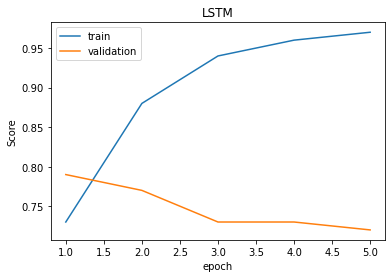

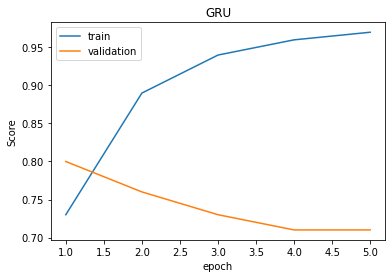

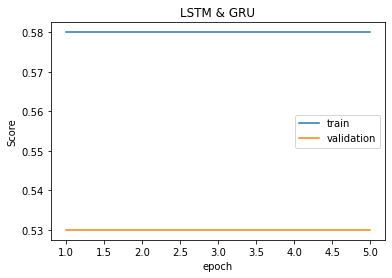

In [78]:
# LSTM
plt.plot(ep , l_train_accuracy)
plt.plot(ep , l_val_accuracy)
plt.title("LSTM")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# GRU
plt.plot(ep , g_train_accuracy)
plt.plot(ep , g_val_accuracy)
plt.title("GRU")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# LSTM + GRU
plt.plot(ep , j_train_accuracy)
plt.plot(ep , j_val_accuracy)
plt.title("LSTM & GRU")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

**Optimizer Comparison**

In [83]:
# Adam
a_train_accuracy = [0.73,0.89,0.94,0.96,0.97]
a_val_accuracy = [0.78,0.78,0.76,0.75,0.73]
a_train_loss = [0.53,0.29,0.17,0.11,0.08]
a_val_loss = [0.48,0.50,0.59,0.83,0.86]

dict1 = {'epoch': ep, 'tr_loss': a_train_loss, 'tr_score': a_train_accuracy,
         'val_loss': a_val_loss, 'val_score': a_val_accuracy} 
df_adam= pd.DataFrame(dict1)

# RMSprop
rms_train_accuracy = [0.73,0.85,0.88,0.91,0.93]
rms_val_accuracy = [0.78,0.78,0.78,0.77,0.75]
rms_train_loss = [0.53,0.36,0.31,0.25,0.21]
rms_val_loss = [0.47,0.46,0.49,0.49,0.58]

dict2 = {'epoch': ep, 'tr_loss': rms_train_loss, 'tr_score': rms_train_accuracy,
         'val_loss': rms_val_loss, 'val_score': rms_val_accuracy} 
df_prop = pd.DataFrame(dict2)

# Adagrad
agrad_train_accuracy = [0.58,0.58,0.58,0.58,0.58]
agrad_val_accuracy = [0.53,0.53,0.53,0.53,0.53]
agrad_train_loss = [0.69,0.69,0.68,0.68,0.68]
agrad_val_loss = [0.69,0.69,0.69,0.69,0.69]

dict3 = {'epoch': ep, 'tr_loss': agrad_train_loss, 'tr_score': agrad_train_accuracy,
         'val_loss': agrad_val_loss, 'val_score': agrad_val_accuracy} 
df_agrad = pd.DataFrame(dict3)

# Adadelta
ad_train_accuracy = [0.53,0.55,0.57,0.57,0.58]
ad_val_accuracy = [0.53,0.53,0.53,0.53,0.53]
ad_train_loss = [0.69,0.69,0.69,0.69,0.69]
ad_val_loss = [0.69,0.69,0.69,0.69,0.69]

dict4 = {'epoch': ep, 'tr_loss': ad_train_loss, 'tr_score': ad_train_accuracy,
         'val_loss': ad_val_loss, 'val_score': ad_val_accuracy} 
df_ad = pd.DataFrame(dict4)

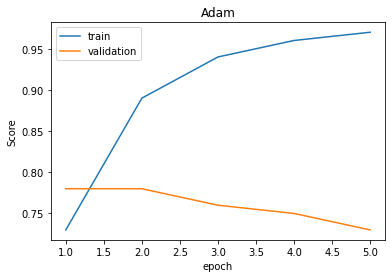

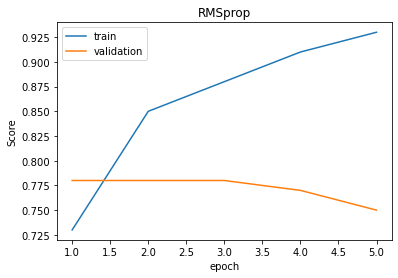

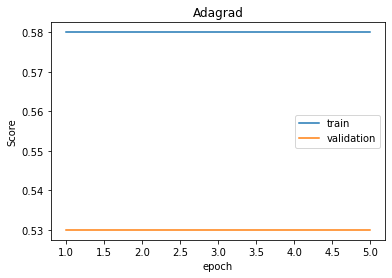

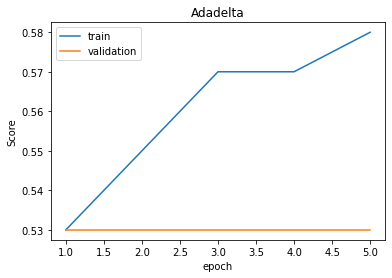

In [84]:
# Adam
plt.plot(ep , a_train_accuracy)
plt.plot(ep , a_val_accuracy)
plt.title("Adam")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# RMSprop
plt.plot(ep , rms_train_accuracy)
plt.plot(ep , rms_val_accuracy)
plt.title("RMSprop")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# Adagrad
plt.plot(ep , agrad_train_accuracy)
plt.plot(ep , agrad_val_accuracy)
plt.title("Adagrad")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# Adadelta
plt.plot(ep , ad_train_accuracy)
plt.plot(ep , ad_val_accuracy)
plt.title("Adadelta")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

**Learning Rate Comparison**

In [81]:
# lr 0.005
train_accuracy_5 = [0.73,0.85,0.88,0.91,0.93]
val_accuracy_5 = [0.78,0.79,0.77,0.76,0.68]
train_loss_5 = [0.53,0.36,0.30,0.25,0.2]
val_loss_5 = [0.48,0.47,0.49,0.52,0.67]

ep = [1,2,3,4,5]
dict1 = {'epoch': ep, 'tr_loss': train_loss_5, 'tr_score': train_accuracy_5,
         'val_loss': val_loss_5, 'val_score': val_accuracy_5} 
df_5 = pd.DataFrame(dict1)

# lr 0.008
train_accuracy_8 = [0.74,0.85,0.88,0.91,0.93]
val_accuracy_8 = [0.8,0.79,0.77,0.76,0.71]
train_loss_8 = [0.53,0.36,0.3,0.25,0.2]
val_loss_8 = [0.47,0.47,0.49,0.52,0.58]

dict2 = {'epoch': ep, 'tr_loss': train_loss_8, 'tr_score': train_accuracy_8,
         'val_loss': val_loss_8, 'val_score': val_accuracy_8} 
df_8 = pd.DataFrame(dict2)

# lr 0.003
train_accuracy_3 = [0.73,0.85,0.88,0.9,0.92]
val_accuracy_3 = [0.78,0.79,0.77,0.75,0.72]
train_loss_3 = [0.54,0.36,0.31,0.27,0.22]
val_loss_3 = [0.48,0.48,0.47,0.54,0.56]

dict3 = {'epoch': ep, 'tr_loss': train_loss_3, 'tr_score': train_accuracy_3,
         'val_loss': val_loss_3, 'val_score': val_accuracy_3} 
df_3 = pd.DataFrame(dict3)

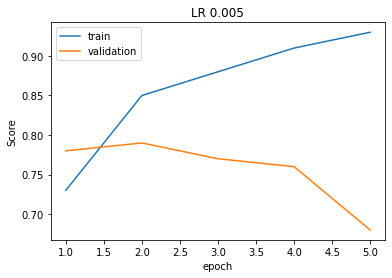

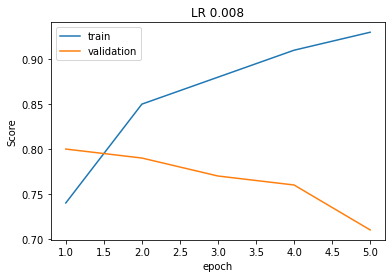

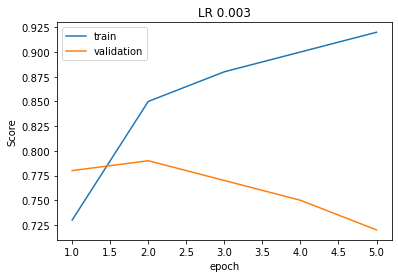

In [82]:
# learning rate 0.005
plt.plot(ep , train_accuracy_5)
plt.plot(ep , val_accuracy_5)
plt.title("LR 0.005")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# learning rate 0.008
plt.plot(ep , train_accuracy_8)
plt.plot(ep , val_accuracy_8)
plt.title("LR 0.008")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

# learning rate 0.003
plt.plot(ep , train_accuracy_3)
plt.plot(ep , val_accuracy_3)
plt.title("LR 0.003")
plt.xlabel("epoch")
plt.ylabel("Score")
plt.legend(['train', 'validation'])
plt.show()

**Analysis**

As the graph suggests that the LSTM and GRU are performing quite the same with a slight average better result shown by LSTM. The joint model between the two is somewhat straigt line between the accuracies of the train and validation. The reason for this is that GRU constitutes 2 gates while LSTM constitutes 3 gates so a combination between the two makes it an incorrect model to begin with. However, it was done to merely test the result with a combination of the two.

The optimizer graphs suggests that the Adam and RMSprop seems to be performing quite close to each other whereas the latter two seem to be quite bad. The reason for this is the ability for the Adam and RMSprop to tackle for more variables such as momentum, bias etc. We selected the RMSprop as the optimizer for our final model since it was giving us the best average result as compared to Adam optimizer.

The variation in the learning rates seems to suggest the 0.005 learning is sufficient enough to catter for the model most effectively.

The structure for our final model after summing up the above results comes out to be as follows:

1. Initial layer with embedding, input set at 23(longest tweet) and 100 hidden units with bidirectional using LSTM and drop out rate set at 0.2.
2. The second layer was taken as Dense layer with activation Relu.
3. The output layer was also taken as Dense but with the activation set to Sigmoid.

## Kaggle Submission

In [88]:
pred = model_f.predict(test_pad)
temp = pd.read_csv("sample_submission.csv")
temp["target"] = pred
temp["target"] = temp["target"].apply(lambda x : 0 if x<=.5 else 1)
sub.to_csv("final_submit_kaggle.csv", index=False)

## Conclusion

The RNN is quite an effective technique in text classification with the simple model we designed doing substantially well. The most important takeaway from the project is that the selection of the right parameters and hyperparamters can vary the output quite a lot. It can be understood from the example the selection of the optimizer where some optimizers produced quite poor results. Another important takeaway was the need to convert the data to sequencing with the padding to be able to add it into the the model. The bidirectional gates was also a major understanding in the sense to use GRU was simpler and smaller dataset and LSTM for larger and complex data since it allows more tweaking. The model may be further improved even by testing complex architectures with additional layers or tweaking the current ones even.